In [ ]:
!wget --no-check-certificate \
    "https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip" \
    -O "/content/sample_data/FingerPrint.zip"

--2023-06-08 15:34:53--  https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main [following]
--2023-06-08 15:34:54--  https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/sample_data/FingerPrint.zip’

/content/sample_dat     [   <=>              ]   4.19M  8.41MB/s    in 0.5s    

2023-06-08 15:34:55 (8.41 MB/s) - ‘/content/sample_data/FingerPrint.zip’ saved [4394944]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sample_data/FingerPrint.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/sample_data/') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
mkdir '/content/sample_data/LowResolution'

In [ ]:
cd /content/sample_data/FingerPrintData-main

/content/sample_data/FingerPrintData-main


In [ ]:
import os
os.rename('DB1_B (1)', 'DB1_B')

In [ ]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/sample_data/FingerPrintData-main/DB1_B'
output_dir = '/content/sample_data/LowResolution'



scale_factor = 0.2

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    input_image = Image.open(os.path.join(input_dir, filename))
    new_size = (int(input_image.size[0] * scale_factor), int(input_image.size[1] * scale_factor))
    output_image = input_image.resize(new_size, resample=Image.LANCZOS)   
    # Save the output image to the output directory
    output_image.save(os.path.join(output_dir, filename))

In [ ]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.12.0


In [ ]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/sample_data/FingerPrintData-main/DB1_B'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):       
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 283.23it/s]


In [ ]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 1117.54it/s]


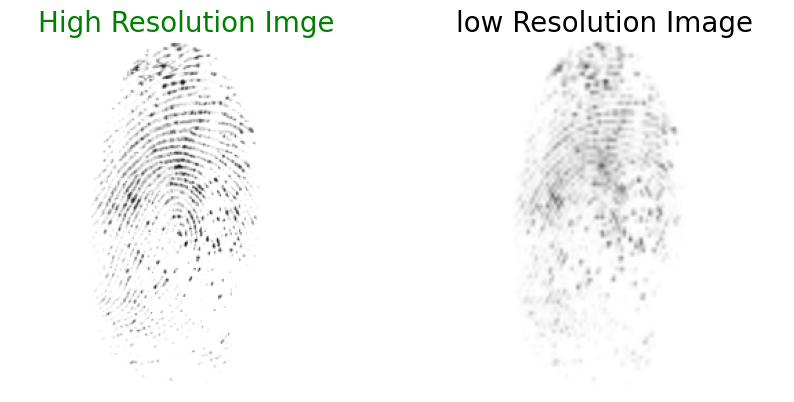

In [ ]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [ ]:
train_high_image = high_img[:55]
train_low_image = low_img[:55]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[55:60]
validation_low_image = low_img[55:60]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[60:]
test_low_image = low_img[60:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (55, 256, 256, 3)
Shape of test images: (6, 256, 256, 3)
Shape of validation images: (5, 256, 256, 3)


In [ ]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [ ]:
#@title Default title text
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, Conv2DTranspose,PReLU
#from tf.keras.layers import PReLU
from keras.initializers import Constant
import tensorflow as tf


ScaleFactor = 2

def fsrcnn_model():
    model = Sequential()
    print("done1")
    #feature extraction
    model.add(Conv2D(filters=56, kernel_size=5, padding='same', input_shape=(int(256/ScaleFactor),int(256/ScaleFactor), 3)))
    
    print("done11")
    #model.add(Activation('prelu'))
    model.add(PReLU())
    print("done12")
    model.add(Conv2D(filters=16, kernel_size=1, padding='same'))
    print("done13")
   # model.add(Activation('prelu'))
    model.add(PReLU())
    print("done2")
    #shrinking
    model.add(Conv2D(filters=12, kernel_size=1, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    print("done3")
    #nonlinear mapping
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    print("done4")
    #expanding
    model.add(Conv2D(filters=56, kernel_size=1, padding='same'))
    #model.add(Activation('prelu'))
    model.add(PReLU())
    print("done5")
    #Decpnvolution
    model.add(Conv2DTranspose(filters=1, kernel_size=9,
              strides=(ScaleFactor,ScaleFactor), padding='same'))
    print("done6")
    #inputs = tf.keras.layers.Input( shape=( 256,256,3, ) )
    #input1 = tf.keras.Input(shape=(None,None,3,))
    #output=model(input1)
    #model = tf.keras.Model(inputs=input1, outputs=output)
    print("done7")
    return model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

def train_model():
    #model = build_model()
    model = fsrcnn_model()
    print("done8")
    optimizer = Adam(lr=0.0001)
    print("done9")
    model.compile(optimizer=optimizer, loss=MeanSquaredError(),metrics=[PSNR,"accuracy"])
    print("done10")
    # Load and preprocess training data
    x_train, y_train =  train_low_image, train_high_image
    print(x_train.shape)
    print(y_train.shape)
    x_train,y_train =changeImageDim(x_train,y_train)
    print(x_train.shape)
    print(y_train.shape)

    model.fit(x_train,y_train, epochs=100, batch_size=1)
    model.fit
    return model

In [ ]:
'''def changeImageDim(x_train):
  print(x_train.shape)
  #x_train = np.reshape(x_train,(len(x_train),int(SIZE/ScaleFactor),int(SIZE/ScaleFactor),3))
  print("start resizing")
  x_train=tf.image.resize(x_train,(len(x_train),int(SIZE/ScaleFactor),int(SIZE/ScaleFactor),3))
  print("done resizing")
  #resized_image = tf.image.resize(input_image, (SIZE, SIZE))
  return x_train;'''

def changeImageDim(x_train,y_train):
    print("Start resizing")
    new_height = int(SIZE / ScaleFactor)
    new_width = int(SIZE / ScaleFactor)
    
    resized_x_train = tf.image.resize(x_train, [new_height, new_width])
    #resized_y_train = tf.image.resize(y_train, [new_height, new_width])
    #resized_x_train = tf.image.rgb_to_grayscale(resized_x_train)
    #resized_y_train = tf.image.rgb_to_grayscale(y_train)
    print("Done resizing")
    return resized_x_train,y_train




In [ ]:
FSRCNN= train_model()

done1
done11
done12
done13
done2
done3
done4


done5
done6
done7
done8
done9
done10
(55, 256, 256, 3)
(55, 256, 256, 3)
Start resizing
Done resizing
(55, 128, 128, 3)
(55, 256, 256, 3)
Epoch 1/100
55/55 [==============================] - 14s 193ms/step - loss: 0.1553 - PSNR: 12.5366 - accuracy: 0.6404
Epoch 2/100
55/55 [==============================] - 9s 167ms/step - loss: 0.0141 - PSNR: 18.8293 - accuracy: 0.7734
Epoch 3/100
55/55 [==============================] - 10s 185ms/step - loss: 0.0130 - PSNR: 19.1948 - accuracy: 0.7734
Epoch 4/100
55/55 [==============================] - 10s 186ms/step - loss: 0.0125 - PSNR: 19.3505 - accuracy: 0.7734
Epoch 5/100
55/55 [==============================] - 9s 172ms/step - loss: 0.0121 - PSNR: 19.4837 - accuracy: 0.7734
Epoch 6/100
55/55 [==============================] - 9s 170ms/step - loss: 0.0118 - PSNR: 19.5818 - accuracy: 0.7734
Epoch 7/100
55/55 [==============================] - 10s 185ms/step - loss: 0.0116 - PSNR: 19.6520 - accuracy: 0.7734
Epoch 8/100
55/55 [====================

In [ ]:
FSRCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 56)      4256      
                                                                 
 p_re_lu_8 (PReLU)           (None, 128, 128, 56)      917504    
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      912       
                                                                 
 p_re_lu_9 (PReLU)           (None, 128, 128, 16)      262144    
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 12)      204       
                                                                 
 p_re_lu_10 (PReLU)          (None, 128, 128, 12)      196608    
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 12)     

In [ ]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted,cmap='gray')
   
    plt.show()

1/1 [==============================] - 0s 219ms/step
(1, 256, 256, 1)
(256, 256, 1)


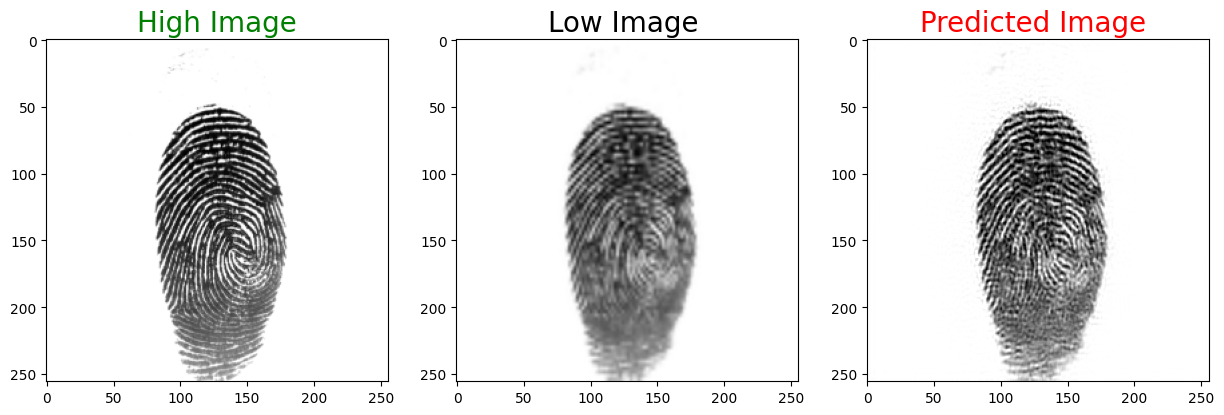

PSNR tf.Tensor(21.749416, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 69ms/step
(1, 256, 256, 1)
(256, 256, 1)


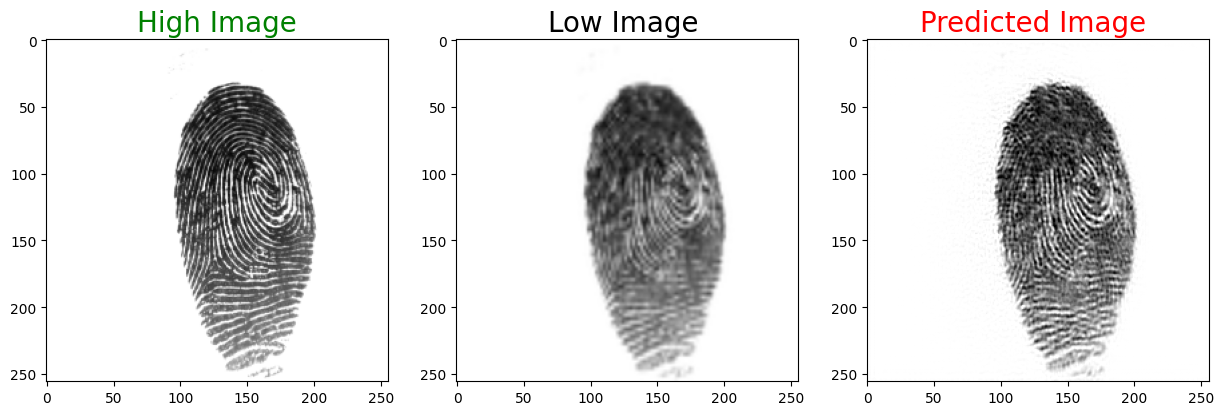

PSNR tf.Tensor(21.606848, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 72ms/step
(1, 256, 256, 1)
(256, 256, 1)


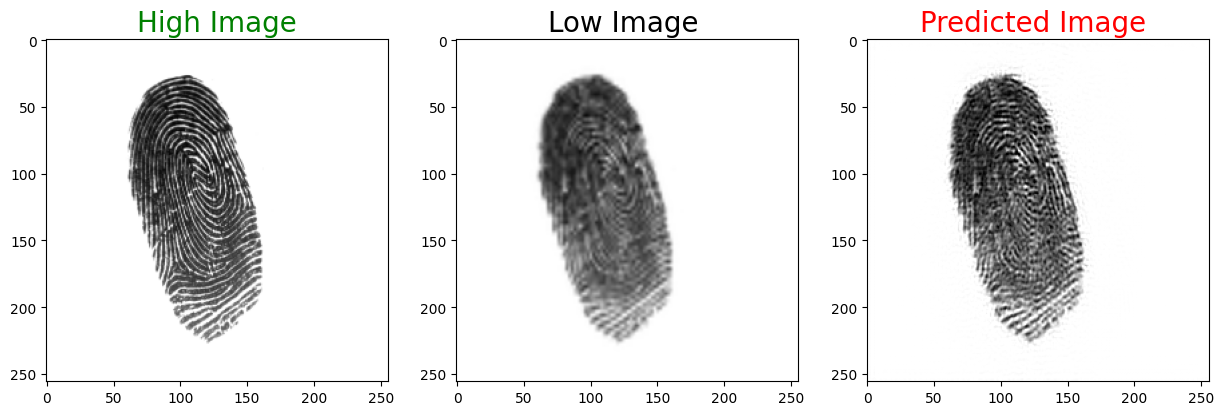

PSNR tf.Tensor(21.94788, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 103ms/step
(1, 256, 256, 1)
(256, 256, 1)


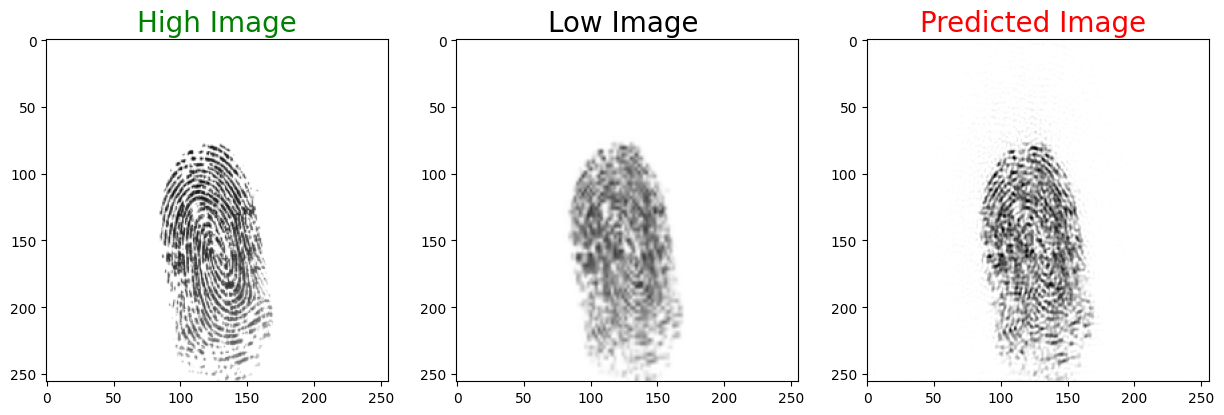

PSNR tf.Tensor(21.975603, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 137ms/step
(1, 256, 256, 1)
(256, 256, 1)


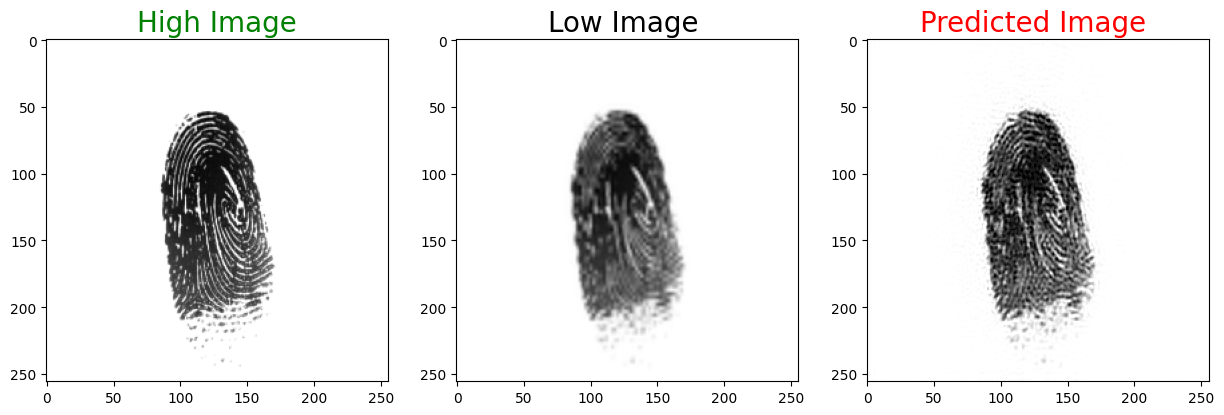

PSNR tf.Tensor(23.276382, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 98ms/step
(1, 256, 256, 1)
(256, 256, 1)


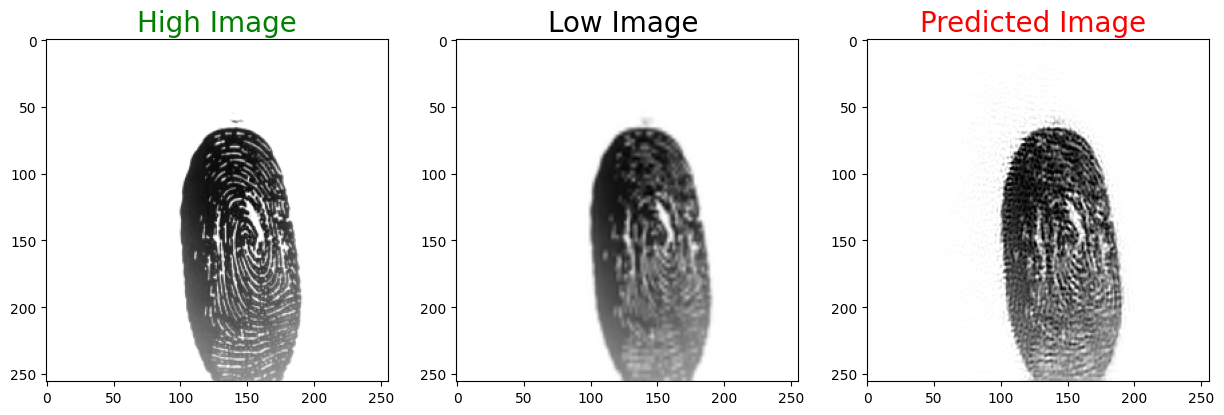

PSNR tf.Tensor(23.213308, shape=(), dtype=float32) dB


In [ ]:
for i in range(6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    #input_image = tf.image.rgb_to_grayscale(input_image)
    resized_image = tf.image.resize(input_image, (int(SIZE/ScaleFactor), int(SIZE/ScaleFactor)))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    print(predicted.shape)
    predicted = np.reshape(predicted, (256, 256, 1))
    #predicted = np.squeeze(predicted, axis=0)
    print(predicted.shape)
    plot_images(test_high_image[i], test_low_image[i], predicted)
    print('PSNR', PSNR(test_high_image[i], predicted), 'dB')

In [ ]:
for i in range(0,6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    #input_image = tf.image.rgb_to_grayscale(input_image)
    resized_image = tf.image.resize(input_image, (int(SIZE/ScaleFactor), int(SIZE/ScaleFactor)))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    predicted = np.reshape(predicted, (256, 256, 1))
    print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB')

1/1 [==============================] - 0s 63ms/step
PSNR 21.749416 dB
1/1 [==============================] - 0s 62ms/step
PSNR 21.606848 dB
1/1 [==============================] - 0s 66ms/step
PSNR 21.94788 dB
1/1 [==============================] - 0s 65ms/step
PSNR 21.975603 dB
1/1 [==============================] - 0s 69ms/step
PSNR 23.276382 dB
1/1 [==============================] - 0s 72ms/step
PSNR 23.213308 dB
